In [1]:
#Nama : I Putu Andika Prasetya
#NIM : 2205551137
#Tubes Aljabar Linear(D)

In [ ]:
#KUMPULAN DATA PENYAKIT JANTUNG
#Kumpulan data ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hungaria, Swiss, dan Long Beach V. 
#Ini berisi 76 atribut, termasuk atribut yang diprediksi, tetapi semua percobaan yang diterbitkan mengacu pada penggunaan subset 
#dari 14 atribut tersebut. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Itu adalah bilangan bulat
#bernilai 0 tidak ada penyakit dan 1 = penyakit.
#Informasi atribut konten
#1. Usia
#2. Jenis kelamin
#3. Jenis nyeri dada (4 nilai)
#4. Tekanan darah istirahat
#5. Kolesterol serum dalam mg/dl
#6. Gula darah puasa > 120 mg/dl
#7. hasil elektrokardiografi istirahat (nilai 0,1,2)
#8. detak jantung maksimum tercapai
#9. latihan diinduksi angina
#10. oldpeak = ST depresi yang diinduksi oleh latihan relatif terhadap istirahat
#11. kemiringan segmen ST latihan puncak
#12. jumlah kapal utama (0-3) diwarnai oleh flourosopy
#13. thal: 0 = normal; 1 = cacat tetap; 2 = cacat yang dapat dibalik
#14. Nama dan nomor jaminan sosial pasien baru-baru ini dihapus dari database, diganti dengan nilai dummy.

In [3]:
#Impor dataset yang telah di install dari url : 
#https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?datasetId=216167&searchQuery=k+means
medical_df = pd.read_csv("heart.csv")

In [4]:
medical_df.shape

(1025, 14)

In [5]:
#Terdapat bahwa ada 1025 instance dan 14 atribut dalam dataset

In [6]:
#Melihat data
medical_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
#Melihat data age dan jumlah cholestrol
X=medical_df[["age","chol"]]
X

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294
...,...,...
1020,59,221
1021,60,258
1022,47,275
1023,50,254


In [10]:
#Pratinjau dataset
medical_df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [11]:
#Melihat ringkasan dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
#Melihat data yang hilang pada dataset
X.isnull().sum()

age     0
chol    0
dtype: int64

In [14]:
#Mihat ringkasan statistik variabel numerik
medical_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#Pada kode di atas, StandardScaler() dari sklearn.preprocessing digunakan untuk melakukan penskalaan fitur pada data X.
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.26843658, -0.65933209],
       [-0.15815703, -0.83386117],
       [ 1.71659547, -1.39623266],
       ...,
       [-0.81983438,  0.56237149],
       [-0.4889957 ,  0.15513696],
       [-0.04787747, -1.12474297]])

In [18]:
#Kode di atas merupakan bagian dari proses pembangunan model K-means clustering dengan variasi nilai K dari 2 hingga 11.
model_labels={}
centroids={}
i_score=[]
s_score=[]
for k in range(2,12):
    #model building
    model=KMeans(n_clusters=k)
    #model fit 
    model=model.fit(X)
    # get the output labels
    labels=model.labels_
    model_labels[k]=labels
    #inersia
    i_score.append(model.inertia_) 
    #siluet
    s_score.append(silhouette_score(X,labels))
    #centroids
    centroids[k]=model.cluster_centers_
    
    print(f"---- inertia {model.inertia_} silhoutte {silhouette_score(X,labels)}")

---- inertia 1263.7902483998382 silhoutte 0.36159750619509057
---- inertia 854.4356824031775 silhoutte 0.3705883103896505
---- inertia 688.1734069101879 silhoutte 0.3570218710085035
---- inertia 553.773195457532 silhoutte 0.3596078253379513
---- inertia 474.4240261165392 silhoutte 0.3539873768622777
---- inertia 396.75913436707225 silhoutte 0.36593875825190025
---- inertia 363.1894122125101 silhoutte 0.35003033200034833
---- inertia 312.09060227751667 silhoutte 0.3637855769001463
---- inertia 276.4946421591649 silhoutte 0.37085543129237064
---- inertia 249.04586884566675 silhoutte 0.3793431189495864


Text(0.5, 0, 'K')

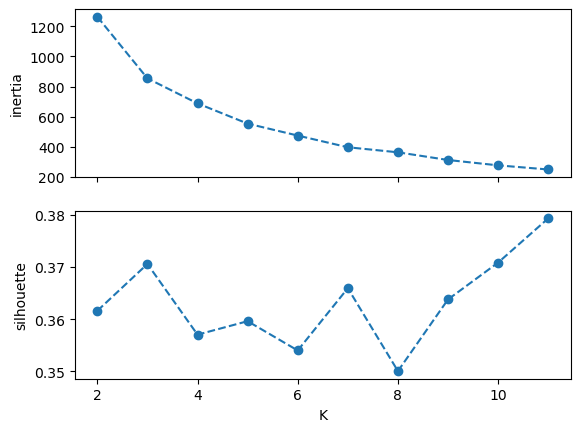

In [19]:
#Kode yang Anda tampilkan akan membuat dua grafik yang menunjukkan perubahan inertia (SSE) 
#dan nilai silhouette score dengan variasi nilai K.
#Dengan kode ini, dua grafik akan ditampilkan dalam satu gambar, di mana grafik pertama menunjukkan perubahan inertia (SSE)
#dan grafik kedua menunjukkan perubahan nilai silhouette score dengan variasi nilai K.
fig,ax=plt.subplots(2,1,sharex=True)
plt.subplot(211) 
plt.plot(range(2,12),i_score,"o--")
plt.ylabel("inertia")

plt.subplot(212) 
plt.plot(range(2,12),s_score,"o--")
plt.ylabel("silhouette")
plt.xlabel("K")

In [20]:
#Ekspresi K_labels = model_labels[3] berarti variabel K_labels akan diisi dengan nilai dari elemen pada indeks ke-3 dari list 
#atau array model_labels.
K_labels=model_labels[3]

In [21]:
#Ekspresi k_centroid = centroids[3] berarti variabel k_centroid akan diisi dengan nilai dari elemen pada indeks ke-3
#dari list atau array centroids.
k_centroid=centroids[3]

Text(0.5, 1.0, 'K-Means Clustering Heart Disease')

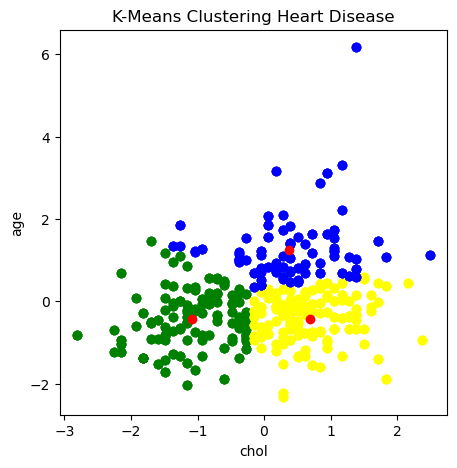

In [30]:
#Kode dibawah menghasilkan sebuah scatter plot yang memvisualisasikan kluster 
#dan pusat kluster (centroid) dari suatu algoritma klustering.
fig,ax=plt.subplots(figsize=(5,5))
#Scatter plot pertama menampilkan data pada kluster pertama dengan warna hijau.
plt.scatter(X[K_labels == 0,0],X[K_labels == 0,1],c="green",label="cluster1")
#Scatter plot kedua menampilkan data pada kluster kedua dengan warna kuning.
plt.scatter(X[K_labels == 1,0],X[K_labels == 1,1],c="yellow",label="cluster2")
#Scatter plot ketiga menampilkan data pada kluster ketiga dengan warna biru.
plt.scatter(X[K_labels == 2,0],X[K_labels == 2,1],c="blue",label="cluster3")
#Scatter plot terakhir menampilkan pusat kluster (centroid) dari ketiga kluster dengan warna merah.
plt.scatter(k_centroid[:,0],k_centroid[:,1],c="r",label="centroids")
plt.xlabel("chol")
plt.ylabel("age")
plt.title("K-Means Clustering Heart Disease")
#Dengan scatter plot ini, kita dapat memvisualisasikan bagaimana data terkelompok dalam kluster-kluster 
#dan di mana pusat kluster berada dalam ruang fitur "chol" dan "age".

In [23]:
#Dengan analysis, kita dapat fokus pada analisis yang spesifik pada kolom "age" (usia) dan "chol" (kadar kolesterol) 
#tanpa harus memperhatikan kolom lainnya dalam DataFrame medical_df.
analysis=medical_df[["age","chol"]].copy()
analysis

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294
...,...,...
1020,59,221
1021,60,258
1022,47,275
1023,50,254


In [24]:
#Pernyataan analysis["label"] = K_labels menambahkan kolom baru dengan nama "label" ke dalam DataFrame analysis. 
#Kolom baru ini akan diisi dengan nilai-nilai dari variabel K_labels, yang mewakili label kluster untuk setiap data 
#dalam DataFrame.
analysis["label"]=K_labels
analysis

,age,chol,label
0,52,212,0
1,53,203,1
2,70,174,1
3,61,203,1
4,62,294,2
...,...,...,...
1020,59,221,1
1021,60,258,1
1022,47,275,0
1023,50,254,0


In [27]:
#Pernyataan analysis.groupby("label")["age", "chol"].mean() digunakan untuk melakukan pengelompokan (grouping) 
#berdasarkan kolom "label" pada DataFrame analysis dan menghitung rata-rata dari kolom "age" dan "chol"
#untuk setiap kelompok (kluster).
analysis.groupby("label")[["age", "chol"]].mean()

,age,chol
label,,
0,44.646893,223.406780
1,60.736585,224.407317
2,57.808429,310.563218
